# Line graph e scatter plot
Abbiamo deciso di rappresentare la variazione temporale del numero di laureate in materie STEM in diversi paesi tramite un line graph uno scatter plot con trend lines.

In [16]:
from collections import defaultdict
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [17]:
with open('laureati_nel_mondo_field.csv', 'r') as data_file:
  data_reader = csv.reader(data_file, delimiter =',', quotechar ='"')
  data = list(data_reader)[1:]

data = pd.read_csv('laureati_nel_mondo_field.csv', sep=',', index_col=0)
data = data.reset_index()

sdata = data[['Country', 'SEX', 'Field', 'Education level', 'Year', 'Value']]

scdata = sdata.dropna(subset=['Value'])
scdata

,Country,SEX,Field,Education level,Year,Value
0,Slovenia,F,Generic programmes and qualifications,Upper secondary vocational education,2013,0.0
1,Slovenia,F,Generic programmes and qualifications,Upper secondary vocational education,2014,0.0
2,Slovenia,F,Generic programmes and qualifications,Upper secondary vocational education,2015,0.0
3,Slovenia,F,Generic programmes and qualifications,Upper secondary vocational education,2016,0.0
4,Slovenia,F,Generic programmes and qualifications,Upper secondary vocational education,2017,0.0
...,...,...,...,...,...,...
71813,Bulgaria,M,"Social sciences, journalism and information",Doctoral or equivalent level,2016,74.0
71814,Bulgaria,M,"Social sciences, journalism and information",Doctoral or equivalent level,2018,94.0
71815,Bulgaria,M,"Social sciences, journalism and information",Doctoral or equivalent level,2019,99.0
71816,Bulgaria,M,"Social sciences, journalism and information",Doctoral or equivalent level,2020,86.0


<Figure size 900x600 with 0 Axes>

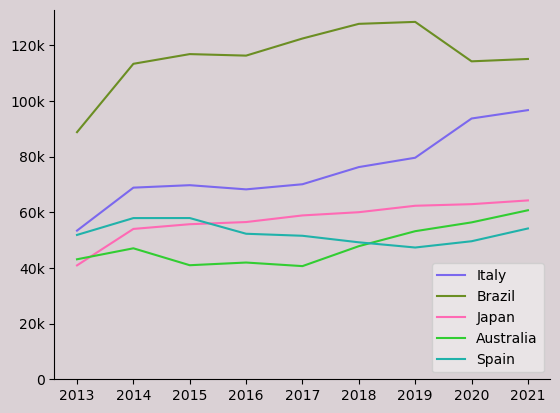

In [18]:
NMS = sdata[sdata['Field'] == "Natural sciences, mathematics and statistics"]
ICT = sdata[sdata['Field'] == "Information and Communication Technologies (ICTs)"]
EMC = sdata[sdata['Field'] == "Engineering, manufacturing and construction"]

STEMdata = pd.concat([NMS, ICT, EMC])
STEMdata = STEMdata.groupby(['Country', 'SEX', 'Year'])['Value'].sum()


STEMdata = STEMdata.reset_index()


STEMdataIT = STEMdata[STEMdata['Country'] == 'Italy']
STEMdataUS = STEMdata[STEMdata['Country'] == 'United States']
STEMdataBR = STEMdata[STEMdata['Country'] == 'Brazil']
STEMdataJP = STEMdata[STEMdata['Country'] == 'Japan']
STEMdataAU = STEMdata[STEMdata['Country'] == 'Australia']
STEMdataSP = STEMdata[STEMdata['Country'] == 'Spain']

STEMdataLG = pd.concat([STEMdataIT,STEMdataUS,STEMdataBR,STEMdataJP,STEMdataAU])

STEMdataITF = STEMdataIT[STEMdataIT['SEX'] == 'F']
STEMdataUSF = STEMdataUS[STEMdataUS['SEX'] == 'F']
STEMdataBRF = STEMdataBR[STEMdataBR['SEX'] == 'F']
STEMdataJPF = STEMdataJP[STEMdataJP['SEX'] == 'F']
STEMdataAUF = STEMdataAU[STEMdataAU['SEX'] == 'F']
STEMdataSPF = STEMdataSP[STEMdataSP['SEX'] == 'F']

plt.figure(figsize = (9, 6))
plt.figure(facecolor='#DAD1D5')
ax = plt.axes()
ax.set_facecolor("#DAD1D5")
plt.plot(STEMdataITF['Year'], STEMdataITF['Value'], color='mediumslateblue')
#plt.plot(STEMdataUSF['Year'], STEMdataUSF['Value'], color='Blue')
plt.plot(STEMdataBRF['Year'], STEMdataBRF['Value'], color='OliveDrab')
plt.plot(STEMdataJPF['Year'], STEMdataJPF['Value'], color='hotpink')
plt.plot(STEMdataAUF['Year'], STEMdataAUF['Value'], color='limegreen')
plt.plot(STEMdataSPF['Year'], STEMdataSPF['Value'], color='lightseagreen')
plt.yticks(ticks= [0, 20000, 40000, 60000, 80000, 100000, 120000], labels = [0, '20k', '40k','60k', '80k', '100k', '120k'])
plt.legend(['Italy', 'Brazil', 'Japan', 'Australia', 'Spain'], loc = 'lower right', facecolor='#eeeaeb')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

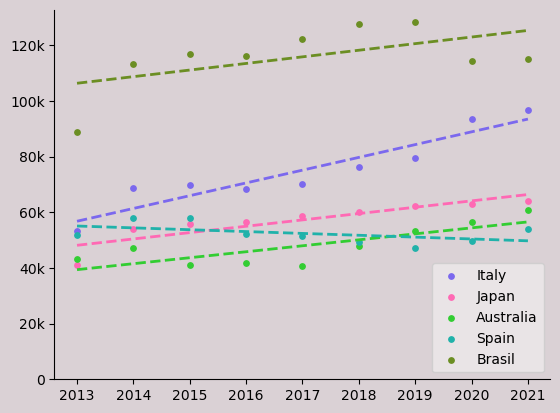

In [19]:
plt.figure(facecolor='#DAD1D5')
ax = plt.axes()
ax.set_facecolor("#DAD1D5")


S1=plt.scatter(STEMdataITF['Year'], STEMdataITF['Value'],color='mediumslateblue',s=15)
z = np.polyfit(STEMdataITF['Year'], STEMdataITF['Value'], 1)
p = np.poly1d(z)
plt.plot(STEMdataITF['Year'], p(STEMdataITF['Year']),color="mediumslateblue", linewidth=2, linestyle="--")

S2=plt.scatter(STEMdataJPF['Year'], STEMdataJPF['Value'], color = 'hotpink',s=15)
a = np.polyfit(STEMdataJPF['Year'], STEMdataJPF['Value'], 1)
b = np.poly1d(a)
plt.plot(STEMdataJPF['Year'], b(STEMdataJPF['Year']),color="hotpink", linewidth=2, linestyle="--")

S3=plt.scatter(STEMdataAUF['Year'], STEMdataAUF['Value'], color = 'limegreen',s=15)
c = np.polyfit(STEMdataAUF['Year'], STEMdataAUF['Value'], 1)
d = np.poly1d(c)
plt.plot(STEMdataAUF['Year'], d(STEMdataAUF['Year']),color="limegreen", linewidth=2, linestyle="--")

S4=plt.scatter(STEMdataSPF['Year'], STEMdataSPF['Value'], color = 'lightseagreen', s=15)
e = np.polyfit(STEMdataSPF['Year'], STEMdataSPF['Value'], 1)
f = np.poly1d(e)
plt.plot(STEMdataSPF['Year'], f(STEMdataSPF['Year']),color="lightseagreen", linewidth=2, linestyle="--")

S5=plt.scatter(STEMdataBRF['Year'], STEMdataBRF['Value'], color = 'OliveDrab', s=15)
g = np.polyfit(STEMdataBRF['Year'], STEMdataBRF['Value'], 1)
h = np.poly1d(g)
plt.plot(STEMdataBRF['Year'], h(STEMdataBRF['Year']),color="OliveDrab", linewidth=2, linestyle="--")

plt.yticks(ticks= [0,20000, 40000, 60000, 80000, 100000, 120000], labels = [0,'20k', '40k','60k', '80k', '100k', '120k'])
plt.legend([S1, S2, S3, S4, S5],['Italy','Japan','Australia', 'Spain','Brasil'], loc = 'lower right', facecolor='#eeeaeb')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Line plot - percentuale

<Figure size 900x600 with 0 Axes>

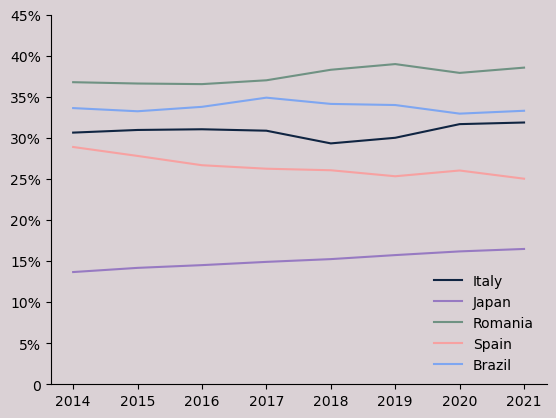

In [26]:
STEMdata = STEMdata.groupby(['Country','SEX', 'Year'])['Value'].sum()
STEMdata = STEMdata.reset_index()

STEMdataTT = STEMdata.groupby(['Country','Year'])['Value'].sum()

STEMdataTT = STEMdataTT.reset_index()
STEMdataTT = STEMdataTT.rename(columns={'Value': 'Total'})

STEMdataF = STEMdata.query('SEX == "F"').reset_index()
STEMdataFF = STEMdataF

STEMdataF = pd.concat([STEMdataF, STEMdataTT['Total']], axis = 1, ignore_index=False, verify_integrity=True)

STEMdataF = STEMdataF.rename(columns={0: 'Country'})
STEMdataF = STEMdataF.rename(columns={1: 'SEX'})
STEMdataF = STEMdataF.rename(columns={2: 'Year'})
STEMdataF = STEMdataF.rename(columns={3: 'Value'})
STEMdataF = STEMdataF.rename(columns={4: 'Total'})
STEMdataPerF = STEMdataF

STEMdataPerF['Percentage'] = (STEMdataF['Value'] / STEMdataF['Total']) * 100

STEMdataPerF = STEMdataPerF.sort_values(by=['Year'])
STEMdataPerF

JP = STEMdataPerF.query('Country == "Japan"')
IT = STEMdataPerF.query('Country == "Italy"')
RO = STEMdataPerF.query('Country == "Romania"')
BR = STEMdataPerF.query('Country == "Brazil"')
SP = STEMdataPerF.query('Country == "Spain"')

IT = IT[1:] #il dato del 2013 potrebbe essere un outlier, chiedere come proseguire
JP = JP[1:]
RO = RO[1:]
SP = SP[1:]
BR = BR[1:]

plt.figure(figsize = (9, 6))
plt.figure(facecolor='#DAD1D5')
ax = plt.axes()
ax.set_facecolor("#DAD1D5")
plt.plot(IT['Year'], IT['Percentage'], color='#102542')
#plt.plot(US['Year'], STEMdataUSF['Percentage'], color='Blue')
plt.plot(JP['Year'], JP['Percentage'], color='#977AC2')
plt.plot(RO['Year'], RO['Percentage'], color='#6F9283')
plt.plot(SP['Year'], SP['Percentage'], color='#F7A1A1')
plt.plot(BR['Year'], BR['Percentage'], color='#7EA6F1')
legend = plt.legend(['Italy','Japan', 'Romania', 'Spain', 'Brazil'], loc = 'lower right', facecolor='#eeeaeb')
legend.get_frame().set_facecolor('#DAD1D5')
legend.get_frame().set_linewidth(0)
plt.yticks(ticks= [0, 5, 10, 15, 20, 25, 30, 35, 40, 45], labels = [0,'5%', '10%','15%', '20%', '25%', '30%', '35%', '40%', '45%'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

<Figure size 3000x1000 with 0 Axes>

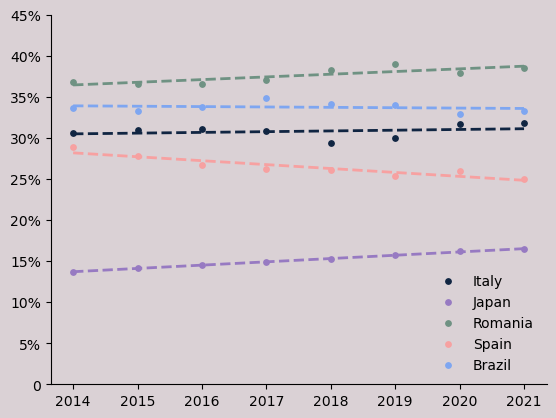

In [25]:
plt.figure(figsize = (30, 10))
plt.figure(facecolor='#DAD1D5')
ax = plt.axes()
ax.set_facecolor("#DAD1D5")

IT = IT[1:] #il dato del 2013 potrebbe essere un outlier, chiedere come proseguire
JP = JP[1:]
RO = RO[1:]
SP = SP[1:]
BR = BR[1:]

ITG = plt.scatter(IT['Year'], IT['Percentage'],color='#102542',s=15)
z = np.polyfit(IT['Year'], IT['Percentage'], 1)
p = np.poly1d(z)
plt.plot(IT['Year'], p(IT['Year']),color="#102542", linewidth=2, linestyle="--")

JPG = plt.scatter(JP['Year'], JP['Percentage'], color = '#977AC2',s=15)
a = np.polyfit(JP['Year'], JP['Percentage'], 1)
b = np.poly1d(a)
plt.plot(JP['Year'], b(JP['Year']),color="#977AC2", linewidth=2, linestyle="--")

ROG = plt.scatter(RO['Year'], RO['Percentage'], color = '#6F9283',s=15)
c = np.polyfit(RO['Year'], RO['Percentage'], 1)
d = np.poly1d(c)
plt.plot(RO['Year'], d(RO['Year']),color="#6F9283", linewidth=2, linestyle="--")

SPG = plt.scatter(SP['Year'], SP['Percentage'], color = '#F7A1A1', s=15)
e = np.polyfit(SP['Year'], SP['Percentage'], 1)
f = np.poly1d(e)
plt.plot(SP['Year'], f(SP['Year']),color="#F7A1A1", linewidth=2, linestyle="--")

BRG = plt.scatter(BR['Year'], BR['Percentage'], color = '#7EA6F1', s=15)
g = np.polyfit(BR['Year'], BR['Percentage'], 1)
h = np.poly1d(g)
plt.plot(BR['Year'], h(BR['Year']),color="#7EA6F1", linewidth=2, linestyle="--")

plt.yticks(ticks= [0, 5, 10, 15, 20, 25, 30, 35, 40, 45], labels = [0,'5%', '10%','15%', '20%', '25%', '30%', '35%', '40%', '45%'])
legend = plt.legend([ITG, JPG, ROG, SPG, BRG],['Italy','Japan', 'Romania','Spain','Brazil'], loc = 'lower right', facecolor='#eeeaeb')
legend.get_frame().set_facecolor('#DAD1D5')
legend.get_frame().set_linewidth(0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)